# Определение перспективного тарифа для телеком-компании   <a class="tocSkip">
**Цель исследования:** 
  
Проанализировать поведение клиентов компании «Мегалайн» — федерального оператора сотовой связи. Сделать вывод — какой из двух тарифных планов: «Смарт» и «Ультра» прибыльнее для компании.

## Изучение данных из файла

In [1]:
# импорт библиотек
!pip install seaborn -U
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from math import factorial
from scipy import stats as st
import seaborn as sns

In [2]:
# чтение файлов
data_calls = pd.read_csv('/datasets/calls.csv') 
data_internet = pd.read_csv('/datasets/internet.csv') 
data_messages = pd.read_csv('/datasets/messages.csv') 
data_tariffs = pd.read_csv('/datasets/tariffs.csv') 
data_users = pd.read_csv('/datasets/users.csv')

In [3]:
data_calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


Рассмотрев таблицу data_calls видим, что каждая строка таблицы содержит информацию о звонках:  
- id — уникальный номер звонка  
- call_date — дата звонка  
- duration — длительность звонка в минутах  
- user_id — идентификатор пользователя, сделавшего звонок  

In [4]:
data_internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


Рассмотрев таблицу data_internet видим, что каждая строка таблицы содержит информацию об интернет-сессиях:
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

In [5]:
data_messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


Рассмотрев таблицу data_imessages видим, что каждая строка таблицы содержит информацию о сообщениях:
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

In [6]:
data_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Рассмотрев таблицу data_tariffs видим, что каждая строка таблицы содержит информацию о тарифах:
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [7]:
data_users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


Рассмотрев таблицу data_users видим, что каждая строка таблицы содержит информацию о пользователях:
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом 
- city — город проживания пользователя
- tarif — название тарифного плана

Создадим список таблиц для дальнейшего использования.

In [8]:
# список таблиц
list_of_data = [data_calls, data_internet, data_messages, data_tariffs, data_users]

Посмотрим на общую информацию о всех таблицах.

In [9]:
for data in list_of_data:
    display(data.info())     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

- Всего представлены данные о звонках и сообщениях 500 пользователей.
- Рассмотрев таблицы, мы обнаружили отсутствующие значения только в таблице data_users в столбце с датой прекращения пользования тарифом. В данном случае, если значение пропущено, то тариф ещё действовал на момент выгрузки данных. Нам не нужно обрабатывать эти пропуски.
- Во всех таблицах с датами данные необходимо привести к формату *datetime* для последующей работы с датой.
- В таблицах data_calls, data_internet количество минут звонков и мегабайт для интернет сессий  указаны с точностью до нескольких знаков после запятой. Нам необходимо в соответствии с тарифными планами округлить звонки до минут, а интернет трафик до гигабайт. Далее необходимо привести эти данные к целочисленному типу.
- В таблицах data_calls, data_internet, data_messages добавить столбец с месяцем оказания услуги и общим количеством оказанных услуг за месяц для последующего объединения таблиц.

### Вывод
Приведем данные к соответствующим типам, а также добавим в таблицу необходимую информацию для последующего анализа.

## Предобработка данных

### Замена типа данных

- **Дата и время**  
  
В таблицах **data_calls**, **data_internet**, **data_messages** и **data_users** переведем столбцы с датой в формат *datetime*. Также добавим столбец с месяцем оказания услуги.

In [10]:
# функция замена типа данных на datetime и добавления месяца 
def set_dt_type_aplly_month(dict_data):
    users = ['reg_date', 'churn_date']
    for key in dict_data:
        data =  dict_data[key]
        data[key] = pd.to_datetime(data[key], format='%Y-%m-%d') 
        if key not in users:
            data['month'] =  data[key].dt.month       

In [11]:
# словарь с датасетами и колонками для перевода в datetime 
dict_data_dt_type = ({
    'call_date': data_calls,
    'session_date': data_internet, 
    'message_date': data_messages,
    'reg_date': data_users,
    'churn_date': data_users
    })

In [12]:
set_dt_type_aplly_month(dict_data_dt_type)

In [13]:
# проверка
for key in dict_data_dt_type:
    column_type = dict_data_dt_type[key].dtypes[key]
    print(key, '-', column_type)

call_date - datetime64[ns]
session_date - datetime64[ns]
message_date - datetime64[ns]
reg_date - datetime64[ns]
churn_date - datetime64[ns]


### Вывод
Теперь в таблицах все столбцы с датой имеют тип *datetime64*. Также мы добавили столбец с месяцем оказания услуги.

### Поиск и обработка ошибок в данных

Посмотрим статистическое описание данных в талблицах **data_calls** и **data_internet**.

In [14]:
i=0
for data in list_of_data:
    if i < 2:
        display(data.describe())
        i += 1    

,duration,user_id,month
count,202607.000000,202607.000000,202607.000000
mean,6.755887,1253.940619,8.574067
std,5.843365,144.722751,2.787093
min,0.000000,1000.000000,1.000000
25%,1.300000,1126.000000,7.000000
50%,6.000000,1260.000000,9.000000
75%,10.700000,1379.000000,11.000000
max,38.000000,1499.000000,12.000000


,Unnamed: 0,mb_used,user_id,month
count,149396.000000,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842,8.563315
std,43127.054745,278.300951,144.050823,2.788717
min,0.000000,0.000000,1000.000000,1.000000
25%,37348.750000,138.187500,1130.000000,7.000000
50%,74697.500000,348.015000,1251.000000,9.000000
75%,112046.250000,559.552500,1380.000000,11.000000
max,149395.000000,1724.830000,1499.000000,12.000000


В данный о длительности звонков есть нулевые значения - это не ошибки, а пропущенные звонки, поэтому нам не нужно их удалять.  
  
В данных об интернет сессиях также есть нулевые значения, которые могли возникнуть ошибочно, либо, например, если оператор сотовой связи предоставляет пользователям пользоваться социальными сетями или мессенджерами без расходования интернет трафика. В соответствии с условиями тарифных планов учитывается не каждая отдельная сессия, а общее количество израсходованных мегабайт за месяц. И по итогам месяца израсходованное количество мегабайт округляется до целых гигабайт. Таким образом не нужно удалять интернет сессии с нулевыми значениями, так как они не повлияют на общее количество израсходованного трафика.

### Вывод
В данных о количестве минут звонков и сессиях интернет трафика есть нулевые значения, однако нельзя считать это ошибкой. Для последующего анализа данных дополнительная обработках таких нулевых значений не требуется. 

### Добавление данных в таблицу

Для каждого пользователя посчитаем и добавим в таблицу:  
- количество сделанных звонков и израсходованных минут разговора по месяцам;    
- количество отправленных сообщений по месяцам;  
- объем израсходованного интернет-трафика по месяцам;  
- помесячную выручку с каждого пользователя в соответствии с тарифным планом. 

- **Звонки, интернет трафик и сообщения**

В таблицах у нас уже есть столбец с месяцем предоставления услуги. Теперь в соответствии с условиями тарифных планов округлим звонки в большую сторону до целых минут.

In [15]:
# округление звонков в большую сторону
data_calls['duration'] = data_calls['duration'].apply(math.ceil)

In [16]:
# проверка
data_calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


Звонки округлены до минут, пропущенные звонки остались длительностью 0 минут. 

Посчитаем количество израсходованных абонентом минут, сообщений, интернет трафика и совершенных звонков за каждый месяц. 

In [17]:
# функция для создания сводных таблиц
def count_val_per_month(data, col, func):    
    data_month = data.pivot_table(index=['user_id', 'month'], values=[col], aggfunc=func)
    return data_month

In [18]:
data_calls_month = count_val_per_month(data_calls, 'duration', ['sum', 'count'])

In [19]:
data_internet_month = count_val_per_month(data_internet, 'mb_used', ['sum'])

In [20]:
data_messages_month = count_val_per_month(data_messages, 'id', ['count'])

In [21]:
# переименование колонок в сводных таблицах
data_calls_month = data_calls_month.rename(columns={'duration': ''})
data_calls_month.columns = ['duration_sum', 'duration_count']
data_internet_month.columns = ['mb_used_sum']
data_messages_month.columns = ['messages_count']

У нас есть сводная таблица с количеством израходованных мегабайт за месяц. Переведем эти значения в гигабайты и в соответствии с условиями тарифа округлим их в большую сторону до целых единиц.

In [22]:
# перевод Мб в Гб и округление в большую сторону
data_internet_month['gb_used_sum'] = (data_internet_month['mb_used_sum'] / 1024).apply(math.ceil)

In [23]:
# проверка
data_internet_month.head()

mb_used_sum  gb_used_sum
user_id month                          
1000    5          2253.49            3
        6         23233.77           23
        7         14003.64           14
        8         14055.93           14
        9         14568.91           15

Объединим все сводные таблицы в одну таблицу. В некоторые месяцы абоненты могли совершать звонки, но не отправлять смс-сообщения. После объединения таблиц, в таких месяцах могут появиться пропуски, поэтому заполним пропущенные значения нулем.  

In [24]:
# объединение таблиц 
data_full = data_calls_month.join([data_internet_month, data_messages_month], how='outer').fillna(0)

In [25]:
# проверка
data_full.head(10)

duration_sum  duration_count  mb_used_sum  gb_used_sum  \
user_id month                                                           
1000    5             159.0            22.0      2253.49          3.0   
        6             172.0            43.0     23233.77         23.0   
        7             340.0            47.0     14003.64         14.0   
        8             408.0            52.0     14055.93         14.0   
        9             466.0            58.0     14568.91         15.0   
        10            350.0            57.0     14702.49         15.0   
        11            338.0            43.0     14756.47         15.0   
        12            333.0            46.0      9817.61         10.0   
1001    11            430.0            59.0     18429.34         18.0   
        12            414.0            63.0     14036.66         14.0   

               messages_count  
user_id month                  
1000    5                22.0  
        6                60.0  
        7                75.0  
        8                81.0  
        9                57.0  
        10               73.0  
        11               58.0  
        12               70.0  
1001    11                0.0  
        12                0.0

In [26]:
# проверка
data_full.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5) to (1499, 12)
Data columns (total 5 columns):
duration_sum      3214 non-null float64
duration_count    3214 non-null float64
mb_used_sum       3214 non-null float64
gb_used_sum       3214 non-null float64
messages_count    3214 non-null float64
dtypes: float64(5)
memory usage: 139.1 KB


Таблицы объединены, пропусков нет.

Для анализа данных нам необходимо добавить в таблицу данные о тарифном плане и городе проживания абонента. Для этого из таблицы **data_users** создадим словарь, в котором ключем будут *user_id*, а значениями - наименование тарифа и город проживания.

In [27]:
# создание словаря с тарифами и городом проживания абонентов
users_tariff_city = data_users[['user_id','tariff', 'city']]
users_tariff_city = users_tariff_city.set_index('user_id')
users_tariff_city

,tariff,city
user_id,,
1000,ultra,Краснодар
1001,smart,Москва
1002,smart,Стерлитамак
1003,ultra,Москва
1004,ultra,Новокузнецк
...,...,...
1495,ultra,Иркутск
1496,smart,Вологда
1497,smart,Челябинск


Теперь присоеденим получившуюся таблицу к общей таблице с расчетными данными.

In [28]:
# соединение таблиц
data_full = data_full.join(users_tariff_city, how='outer')

In [29]:
# удаление индексов и приведение к типу int
data_full.reset_index(inplace=True)
data_full = data_full.astype({'duration_sum': 'int64', 'duration_count': 'int64', 'gb_used_sum': 'int64',  'messages_count': 'int64'})   

In [30]:
# проверка
data_full

,user_id,month,duration_sum,duration_count,mb_used_sum,gb_used_sum,messages_count,tariff,city
0,1000,5,159,22,2253.49,3,22,ultra,Краснодар
1,1000,6,172,43,23233.77,23,60,ultra,Краснодар
2,1000,7,340,47,14003.64,14,75,ultra,Краснодар
3,1000,8,408,52,14055.93,14,81,ultra,Краснодар
4,1000,9,466,58,14568.91,15,57,ultra,Краснодар
...,...,...,...,...,...,...,...,...,...
3209,1498,10,247,41,20579.36,21,42,smart,Владикавказ
3210,1499,9,70,9,1845.75,2,11,smart,Пермь
3211,1499,10,449,68,17788.51,18,48,smart,Пермь
3212,1499,11,612,74,17963.31,18,59,smart,Пермь


- **Помесячная выручка с каждого пользователя в соответствии с тарифным планом**

Для того, чтобы рассчитать помесячную выручку с каждого абонента вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика. Остаток умножим на значение из тарифного плана и прибавим абонентскую плату, соответствующую тарифному плану. 

In [31]:
# функция расчета выручки со звонков сверх лимита + абонентская плата в соответствии с тарифным планом
def calc_profit_calls(row):
    if row['tariff'] == 'smart':
        if row['duration_sum'] > data_tariffs.loc[0, 'minutes_included']:
            profit_calls = (row['duration_sum'] - data_tariffs.loc[0, 'minutes_included']) * data_tariffs.loc[0, 'rub_per_minute'] + data_tariffs.loc[0, 'rub_monthly_fee']
        else:
            profit_calls = data_tariffs.loc[0, 'rub_monthly_fee']
    else: 
        if row['duration_sum'] > data_tariffs.loc[1, 'minutes_included']:
            profit_calls = (row['duration_sum'] - data_tariffs.loc[1, 'minutes_included']) * data_tariffs.loc[1, 'rub_per_minute'] + data_tariffs.loc[1, 'rub_monthly_fee']
        else:
            profit_calls = data_tariffs.loc[1, 'rub_monthly_fee']
    return profit_calls

In [32]:
#  функция расчета выручки с интернет трафика сверх лимита
def calc_profit_internet(row):    
    if row['tariff'] == 'smart':
        if row['gb_used_sum'] > (data_tariffs.loc[0, 'mb_per_month_included'])/1024:
            profit_internet = (row['gb_used_sum'] - ((data_tariffs.loc[0, 'mb_per_month_included'])/1024)) * data_tariffs.loc[0, 'rub_per_gb'] 
        else:
            profit_internet = 0
    else:
        if row['gb_used_sum'] > (data_tariffs.loc[1, 'mb_per_month_included'])/1024:
            profit_internet = (row['gb_used_sum'] - ((data_tariffs.loc[1, 'mb_per_month_included'])/1024)) * data_tariffs.loc[1, 'rub_per_gb']    
        else:            
            profit_internet = 0
    return profit_internet

In [33]:
#  функция расчета выручки с сообщений сверх лимита
def calc_profit_messages(row):    
    if row['tariff'] == 'smart':
        if row['messages_count'] > data_tariffs.loc[0, 'messages_included']:
            profit_messages = (row['messages_count'] - data_tariffs.loc[0, 'messages_included']) * data_tariffs.loc[0, 'rub_per_message'] 
        else:
            profit_messages = 0
    else:
        if row['messages_count'] > data_tariffs.loc[1, 'messages_included']:
            profit_messages = (row['messages_count'] - data_tariffs.loc[1, 'messages_included']) * data_tariffs.loc[1, 'rub_per_message'] 
        else:            
            profit_messages = 0
    return profit_messages

In [34]:
#  функция суммирования всех видов выручки и добавления в таблицу data_full
def calc_profit(row):
    row = row
    profit_calls = calc_profit_calls(row)
    profit_internet = calc_profit_internet(row)
    profit_messages = calc_profit_messages(row)
    profit = profit_calls + profit_internet + profit_messages
    return profit

In [35]:
data_full['profit'] = data_full.apply(calc_profit, axis=1)

In [36]:
# проверка
data_full.head(10)

,user_id,month,duration_sum,duration_count,mb_used_sum,gb_used_sum,messages_count,tariff,city,profit
0,1000,5,159,22,2253.49,3,22,ultra,Краснодар,1950.0
1,1000,6,172,43,23233.77,23,60,ultra,Краснодар,1950.0
2,1000,7,340,47,14003.64,14,75,ultra,Краснодар,1950.0
3,1000,8,408,52,14055.93,14,81,ultra,Краснодар,1950.0
4,1000,9,466,58,14568.91,15,57,ultra,Краснодар,1950.0
5,1000,10,350,57,14702.49,15,73,ultra,Краснодар,1950.0
6,1000,11,338,43,14756.47,15,58,ultra,Краснодар,1950.0
7,1000,12,333,46,9817.61,10,70,ultra,Краснодар,1950.0
8,1001,11,430,59,18429.34,18,0,smart,Москва,1150.0
9,1001,12,414,63,14036.66,14,0,smart,Москва,550.0


### Вывод
На основе имеющихся таблиц с данными мы создали сводную таблицу **data_full**, в которую добавили для каждого пользователя количество сделанных звонков и израсходованных минут, отправленных сообщений и израсходованного интернет-трафика по месяцам. Посчитали помесячную выручку с каждого пользователя в соответствии с тарифным планом. Также добавили в таблицу наименование тарифного плана и город пользователя.

## Исследовательский анализ данных

- **Изучим поведение клиентов оператора, исходя из выборки: сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц**

Используем описательную статистику для каждого тарифного плана.

In [37]:
data_smart = data_full.query('tariff == "smart"')
data_smart.describe()

,user_id,month,duration_sum,duration_count,mb_used_sum,gb_used_sum,messages_count,profit
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,1246.506505,8.346792,417.934948,58.463437,16208.386990,16.328847,33.384029,1289.973531
std,146.119496,2.920316,190.313730,25.939858,5870.476681,5.747061,28.227876,818.404367
min,1001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,550.000000
25%,1121.000000,6.000000,282.000000,40.000000,12643.010000,13.000000,10.000000,550.000000
50%,1239.000000,9.000000,422.000000,60.000000,16506.840000,17.000000,28.000000,1023.000000
75%,1376.000000,11.000000,545.000000,76.000000,20042.930000,20.000000,51.000000,1750.000000
max,1499.000000,12.000000,1435.000000,198.000000,38552.450000,38.000000,143.000000,6770.000000


In [38]:
data_ultra = data_full.query('tariff == "ultra"')
data_ultra.describe()

,user_id,month,duration_sum,duration_count,mb_used_sum,gb_used_sum,messages_count,profit
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,1263.094416,8.250761,526.623350,73.392893,19468.805208,19.494416,49.363452,2070.152284
std,140.694908,2.871762,317.606098,43.916853,10087.170752,9.853511,47.804457,376.187114
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000
25%,1143.000000,6.000000,284.000000,41.000000,11770.260000,12.000000,6.000000,1950.000000
50%,1277.000000,9.000000,518.000000,74.000000,19308.010000,19.000000,38.000000,1950.000000
75%,1381.000000,11.000000,752.000000,104.000000,26837.690000,27.000000,79.000000,1950.000000
max,1495.000000,12.000000,1673.000000,244.000000,49745.690000,49.000000,224.000000,4800.000000


Построим гистограммы распределения минут разговора, отправленных сообщений и израходованного интернет-трафика. 

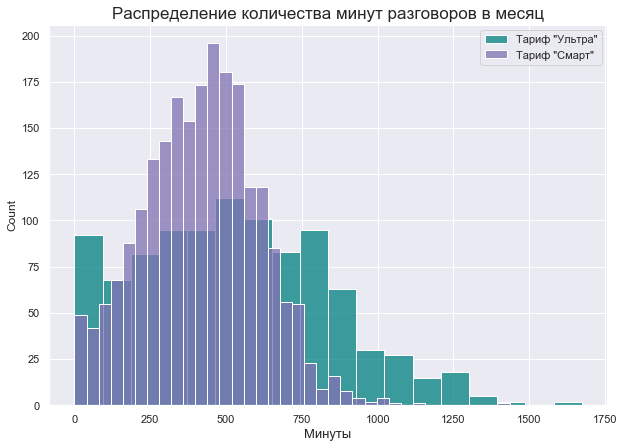

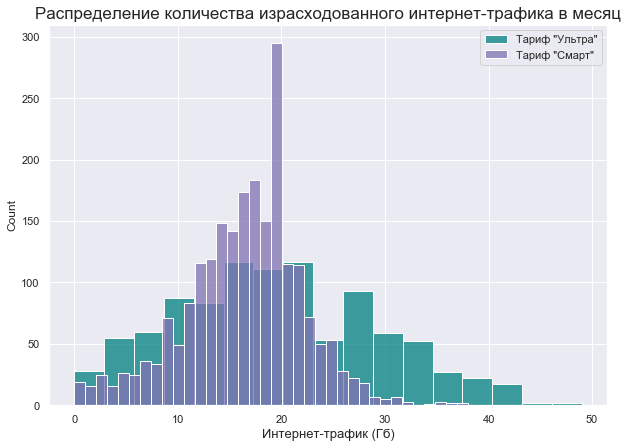

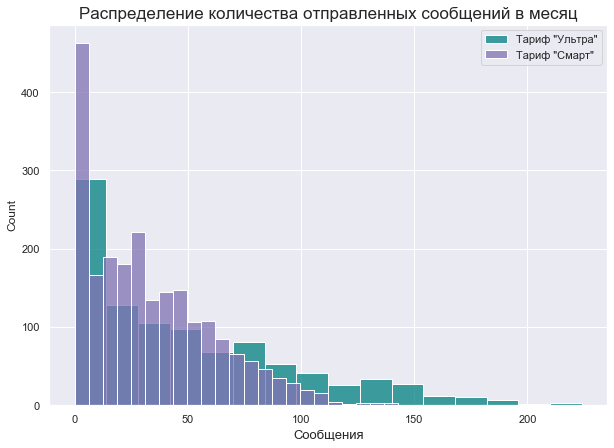

In [39]:
sns.set(style="darkgrid")

list_of_columns = ['duration_sum', 'gb_used_sum', 'messages_count']
list_of_name_label = ['Минуты', 'Интернет-трафик (Гб)', 'Сообщения', 'Пользователи']
hist_titles_list = [
    'Распределение количества минут разговоров в месяц', 
    'Распределение количества израсходованного интернет-трафика в месяц',
    'Распределение количества отправленных сообщений в месяц'
]

i=0
for column in list_of_columns:
    fig, axs = plt.subplots(figsize=(10, 7))
    sns.histplot(data_ultra, x=column, label='Тариф "Ультра"', color="teal",kde=False)    
    sns.histplot(data_smart, x=column, label='Тариф "Смарт"', color="m", kde=False)
    plt.xlabel(list_of_name_label[i], fontsize = 13)
    plt.title(hist_titles_list[i], fontsize = 17)
    plt.legend() 
    plt.show()
    i += 1

Изучив статистическое описание и гистограммы распределения минут разговора, отправленных сообщений и израсходованного интернет-трафика по тарифам можно сделать следующие выводы:

- **Тариф "Смарт"**

  1. Минуты разговора:  
    гистограмма скошена влево, имеет пик на значении 400 -450 минут;  
    в основном пользователи расходуют от 200 до 600 минут в месяц;   
    более, чем в 25%  случаях пользователи не укладываются в рамки тарифного плана - 500 минут в месяц, а значит им проходится доплачивать за минуты сверх тарифного лимита. Чаще всего они дополнительно оплачивают от 45 до 150 минут в месяц, а в некоторых случаях и до 935 минут сверх тарифного лимита. 
  2. Интернет-трафик:  
    гистограмма больше похожа на нормальное распределение, однако имеет большой пик около 19 Гб;     
    основное количество пользователей расходует от 9 до 22 Гб интернет-трафика в месяц;  
    можно наблюдать, что очень часто, более, чем в 50% случаев пользователи не укладываются в тарифный план - 15 Гб в месяц, чаще всего они дополнительно оплачивают от 2 до 12 Гб интернет-трафика сверх тарифного лимита.  
  3. Сообщения:  
    гистограмма сильно скошена влево;  
    большое количество пользователей вообще не пользуются смс-сообщениями, вероятно абоненты предпочитают использовать социальные сети;  
    остальные пользователи отправляют от 5 до 60 сообщений в месяц;      
     более, чем в 25%  случаях пользователи не укладываются в рамки тарифного плана - 50 сообщений в месяц им приходится доплачивать.

- **Тариф "Ультра"**

  1. Минуты разговора:  
    гистограмма скошена влево, пики не так ярко выражены и имеет более широкое распределение;  
    в основном пользователи расходуют от 250 до 800 минут в месяц;   
    все пользователи не расходуют тарифный лимит - 3000 минут в месяц, максимальное количество потраченных минут в месяц - 1673 минуты, что составляет только 56% от тарифного лимита. 
  2. Интернет-трафик:  
    гистограмма похожа на нормальное распределение, также имеет широкое распределение;     
    основное количество пользователей расходует от 6 до 33 Гб интернет-трафика в месяц.  
    так же более, чем в 75% случаях пользователи не расходуют тарифный лимит - 30 Гб в месяц, однако расходы небольшой части пользователей могут достигать 49 Гб в месяц;  
  3. Сообщения:  
    гистограмма сильно скошена влево;
    многие пользователи не используют смс-сообщения;  
    остальные пользователи отправляют от 5 до 80 сообщений в месяц;      
    все пользователи не расходуют тарифный лимит - 1000 сообщений в месяц, максимальное количество отправленных сообщений в месяц - 224 минуты, что составляет только 23% от тарифного лимита. 

- **Рассчитаем среднее количество израсходованных минут разговора, Гб интернет-трафика и отправленных сообщений пользователями в месяц для каждого тарифного плана. Рассчитаем дисперсию и стандартное отклонение.**

In [40]:
# статистические данные
data_stat = data_full.pivot_table(index=['tariff'], values=['duration_sum', 'gb_used_sum', 'messages_count'], 
                    aggfunc={'duration_sum': [np.mean, np.var, np.std], 
                             'gb_used_sum': [np.mean, np.var, np.std], 
                             'messages_count': [np.mean, np.var, np.std]})
data_stat

duration_sum                            gb_used_sum            \
               mean         std            var        mean       std   
tariff                                                                 
smart    417.934948  190.313730   36219.315784   16.328847  5.747061   
ultra    526.623350  317.606098  100873.633397   19.494416  9.853511   

                  messages_count                          
              var           mean        std          var  
tariff                                                    
smart   33.028705      33.384029  28.227876   796.812958  
ultra   97.091686      49.363452  47.804457  2285.266143

**Среднее количество** израсходованных минут разговора, Гб интернет-трафика и отправленных сообщений **у пользователей тарифа "Ультра" выше**, чем у пользователей тарифа "Смарт". Можно сказать, что пользователи тарифа "Ультра" ежемесячно расходуют в среднем на 18% - 26% больше минут разговора и интернет-трафика, чем пользователям тарифа "Смарт", а отправляют сообщения они в среднем почти на 50% большее, чем пользователи тарифа "Смарт".

**Стандартное отклонение и дисперсия у пользователей тарифа "Ультра" тоже значительно выше**. Это означает, что разброс значений довольно высокий. Тоже самое мы наблюдали на гистограммах. Гистограммы по тарифу "Ультра" имеют более широкое распределение. Можно сказать, что траты пользователей тарифа "Ультра" более разнообразны, это можно объяснить тем, что они не ограничены таким жестким тарифным лимитом. 

Посмотрим, как менялось количество минут разговора, Гб интернет-трафика и отправленных сообщений в течение года в среднем на одного пользователя для каждого тарифного плана.

In [41]:
# функция создания и объединения сводных таблиц с количеством оказанных услуг за каждый месяц по тарифам 
def pivot_tables_smart_and_ultra(inx, column, func, attach_method):
    pvt_smart = data_smart.pivot_table(index=inx, values=column, aggfunc=func)
    pvt_smart.columns = ['Тариф "Смарт"']
    pvt_ultra = data_ultra.pivot_table(index=inx, values=column, aggfunc=func)
    pvt_ultra.columns = ['Тариф "Ультра"']
    if attach_method == 'simple':
        pvt_full = pvt_smart.join(pvt_ultra)
    else:
        pvt_full = pvt_smart.join(pvt_ultra, how='outer')
    return pvt_full

In [42]:
# вызов функции
duration_full = pivot_tables_smart_and_ultra('month', 'duration_sum', ['mean'], 'simple')
internet_full = pivot_tables_smart_and_ultra('month', 'gb_used_sum', ['mean'], 'simple')
messages_full = pivot_tables_smart_and_ultra('month', 'messages_count', ['mean'], 'simple')
users_full = pivot_tables_smart_and_ultra('month', 'messages_count', ['count'], 'simple')

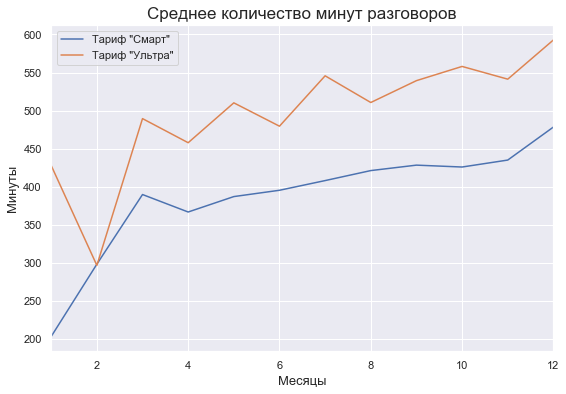

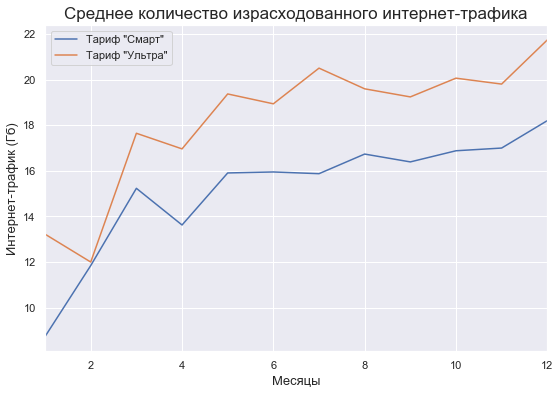

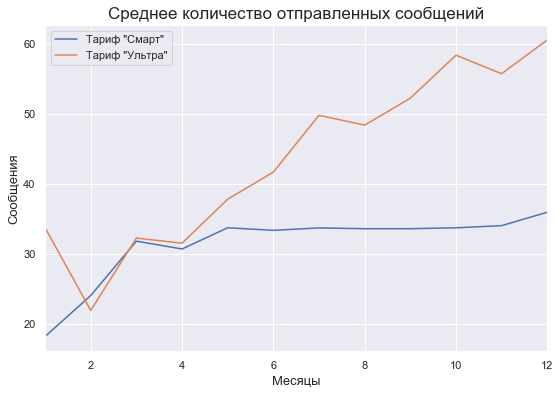

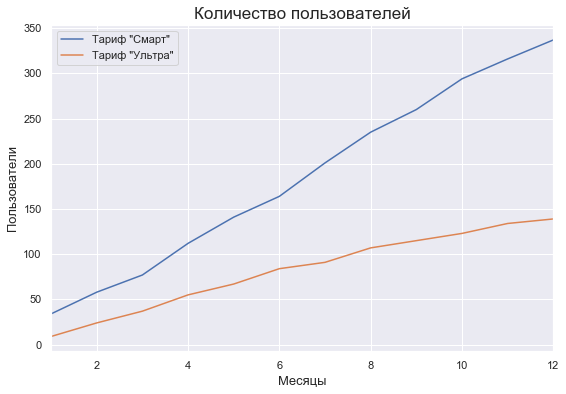

In [43]:
# построение гисторамм 
list_of_tables = [duration_full, internet_full, messages_full, users_full]
plot_titles_list = [
    'Среднее количество минут разговоров', 
    'Среднее количество израсходованного интернет-трафика',
    'Среднее количество отправленных сообщений', 
    'Количество пользователей'
]

i=0
for table in list_of_tables: 
    table.plot(rot=0, grid=True, figsize=(9, 6))
    plt.title(plot_titles_list[i], fontsize = 17)
    plt.xlabel('Месяцы', fontsize = 13)
    plt.ylabel(list_of_name_label[i], fontsize = 13)
    i += 1   

1. Среднее количество минут разговоров:
- В феврале пользователи обоих тарифов в среднем расходовали одинаковое количество минут и начиная с марта и до конца года этот показатель ежемесячно рос. 
- Наиболее выражен рост среднего количества минут разговоров у пользоваталей тарифа "Ультра", на графике видно, что пользователи этого тарифа в среднем ежемесячно расходуют больше минут.
2. Среднее количество израсходованного интернет-трафика:
- Среднее количество израсходованного интернет-трафика с февраля ежемесячно растет у пользователей обоих тарифов. 
- На графике также видно, что рост наиболее выражен у пользователей тарифа "Ультра", пользователи этого тарифа в среднем ежемесячно больше расходуют интернет-трафик.
3. Среднее количество отправленный сообщений:
- У пользователей тарифа "Смарт" количество отправленных сообщений заметно выросло с января по май, далее роста практически не наблюдается. В то время как количество отправляемых сообщений пользователями тарифа "Ультра" начиная с февраля не перестает быстро расти. На графике можно заметить разницу: в феврале - апреле пользователи обоих тарифов  в среднем отправляли практически одинаковое количество сообщений, а в декабре пользователи тарифа "Ультра" отправляли в среднем в 2 раза больше сообщений.
4. Количество пользователей:
- Можно увидеть, что пользователей тарифа "Смарт", гораздо больше, чем пользователей тарифа "Ультра" и их количество продолжает быстро расти. Число пользователей тарифа "Ультра" тоже растет, но гораздо более медленно. Очевидно большее количество людей привлекает более дешевый и доступный тариф.
- В декабре соотношение количества пользователей тарифа "Ультра" и тарифа "Смарт" составляет примерно 1/2.


### Вывод

- Очевидно, что пользователям тарифа "Смарт" в 25% - 50% случаев не хватает тарифного плана и они доплачивают за потраченные сверх тарифного плана минуты разговоров, Гб интернет-трафика и отправленные сообщения.
- Пользователи тарифа "Ультра" наоборот не расходуют весь тарифный план в течение месяца. Анализ показал, что ни один из пользователей в течение года не израсходовал полностью лимит количества минут разговоров и лимит количества сообщений. Однако небольшое количество пользователей этого тарифного плана все-таки расходовали интернет-трафик сверх тарифа. Очевидно некоторому числу пользователей недостаточно интернет-трафика в рамках тарифного плана.
- Среднее количество израсходованных минут разговора, Гб интернет-трафика и отправленных сообщений у пользователей тарифа "Ультра" выше, чем у пользователей тарифа "Смарт". Они ежемесячно расходуют в среднем на 18% - 26% больше минут разговора и интернет-трафика, чем пользователям тарифа "Смарт", а отправляют сообщения в среднем почти на 50% большее.
- Стандартное отклонение и дисперсия у пользователей тарифа "Ультра" значительно выше, а значит, что разброс значений довольно высокий. Можно предположить, что так как пользователи этого тарифного плана не ограничены таким жестким лимитом, как пользователи тарифа "Смарт", то их траты более разнообразны. 
- В течение года наблюдался рост среднего количества минут разговоров, Гб интернет-трафика и отправленных сообщений пользователями обоих тарифных планов.
- Количество пользователей тарифа "Смарт" в 2 раза больше, чем пользователей тарифа "Ультра" и их число продолжает быстро расти. Число пользователей тарифа "Ультра" тоже растет, но более медленно. Очевидно большее количество людей привлекает более дешевый и доступный тарифный план.

## Статистический анализ данных

- **Проверим гипотезу о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается**

Сформулируем нулевую и альтернативную гипотезы. Так как за нулевую гипотезу мы возьмем утверждение, что средняя выручка пользователей обоих тарифов равна, то альтернативный гипотезой будет наоборот утверждение, что средняя выручка пользователей двух тарифов не равна:  
  
**H0** - средняя выручка пользователей тарифов «Ультра» и «Смарт» равна  
**H1** - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Критический уровень статистической значимости примем равным 5%:  
  
alpha = 0.05

Посмотрим на дисперсию двух выборок:

In [44]:
np.var(data_smart['profit'])

669485.2209234245

In [45]:
np.var(data_ultra['profit'])

141373.07325620347

Для того, чтобы проверить гипотезу о равенстве средних двух генеральных совокупностей по выборке используем метод *scipy.stats.ttest_ind* с параметром *equal_var = False*, потому что дисперсии двух выборок значительно отличаются.

In [46]:
# ttest
alpha = 0.05  

results = st.ttest_ind(data_smart['profit'], data_ultra['profit'], equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


Мы видим, что уровень р-значения очень низкий, гораздо ниже 5%, а значит вероятность того, что средняя выручка пользователей тарифов «Ультра» и «Смарт» равна крайне мала. Можно смело утверждать, что **средние выручки пользователей обоих тарифов различаются**.

Для того, чтобы сделать вывод о том какой тариф выгоднее, посмотрим на диаграммы размаха и статистическое описание выручки пользоваталей двух тарифов.

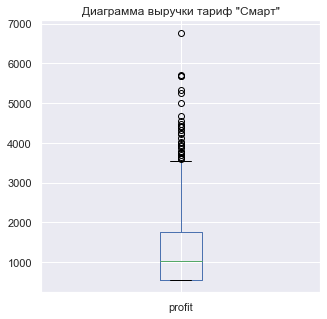

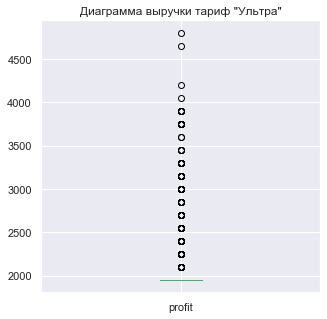

In [47]:
# построение диаграммы размаха для выручки
list_of_data_profit = [data_smart, data_ultra]
tariff_name = ['тариф "Смарт"', 'тариф "Ультра"']

i=0
for data in list_of_data_profit:
    data.boxplot(column=['profit'], figsize=(5, 5))
    plt.title('Диаграмма выручки ' + tariff_name[i])
    plt.show()
    i += 1

In [48]:
# статистическое описание тариф Смарт
data_smart['profit'].describe()

count    2229.000000
mean     1289.973531
std       818.404367
min       550.000000
25%       550.000000
50%      1023.000000
75%      1750.000000
max      6770.000000
Name: profit, dtype: float64

In [49]:
# статистическое описание тариф Ультра
data_ultra['profit'].describe()

count     985.000000
mean     2070.152284
std       376.187114
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: profit, dtype: float64

- **Средняя выручка пользователей тарифа "Ультра" на 60% больше**, чем средняя выручка пользователей тарифа "Смарт". А при этом расходуют пользователи тарифа "Ультра" всего в среднем на 18-26% больше минут разговоров и Гб интернет-трафика и только на 50% больше сообщений, чем пользователи тарифа "Смарт".  
-  **Медианная выручка пользователей тарифа "Ультра" почти в 2 больше**, чем медианная выручка пользователей тарифа "Смарт". Таким образом пользователи этого тарифного плана приносят стабильно высокий доход.
- Мы знаем, что пользователям тарифа "Смарт" часто не хватает лимита тарифного плана и они платят дополнительно. Однако, даже при этом более, чем в 75% случаев они платят меньше чем любой из пользователей тарифа "Ультра".
- Посмотрев на медианные значения, мы может заметить, что примерно в 50% случаев пользователи тарифа "Смарт" готовы платить от 1000 рублей в месяц и больше.  

- **Проверим гипотезу о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов**

Сформулируем нулевую и альтернативную гипотезы. Так как за нулевую гипотезу мы возьмем утверждение, что средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов, то альтернативный гипотезой будет наоборот утверждение, что средняя выручка пользователей из Москвы отличается от средней выручки пользователей из других регионов:  
  
**H0** - средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов  
**H1** - средняя выручка пользователей из Москвы отличается от средней выручки пользователей из других регионов

Критический уровень статистической значимости примем равным 5%:  
  
alpha = 0.05

In [50]:
data_moscow = data_full.query('city == "Москва"')
data_other_cityes = data_full.query('city != "Москва"')

Посмотрим на дисперсию двух выборок:

In [51]:
np.var(data_moscow['profit'])

564710.7117467273

In [52]:
np.var(data_other_cityes['profit'])

653886.3270894174

Для того, чтобы проверить гипотезу о равенстве средних двух генеральных совокупностей по выборкам используем метод *scipy.stats.ttest_ind* с параметром *equal_var = False*, потому что дисперсии двух выборок отличаются.

In [54]:
# ttest
alpha = 0.05  

results = st.ttest_ind(data_moscow['profit'], data_other_cityes['profit'], equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


**Нельзя утверждать, что средняя выручка пользователей из Москвы отличается от средней выручки пользователей из других регионов**, так как вероятность получить такое отличие случайно составляет 52%. 

Для сравнения посмотрим на средние выручки пользователей из Москвы и пользователей из других регионов:

In [55]:
# статистическое описание выручки по Москве
data_moscow['profit'].describe()

count     611.000000
mean     1546.713584
std       752.088071
min       550.000000
25%       780.500000
50%      1750.000000
75%      1950.000000
max      5321.000000
Name: profit, dtype: float64

In [56]:
# статистическое описание выручки по остальным регионам
data_other_cityes['profit'].describe()

count    2603.000000
mean     1524.936227
std       808.787752
min       550.000000
25%       750.000000
50%      1583.000000
75%      1950.000000
max      6770.000000
Name: profit, dtype: float64

В нашей выборке средняя выручка пользователей из Москвы - 1546 рублей практически не отличается от средней выручки пользователей из других регионов - 1524.

### Вывод

1. Средние выручки пользователей обоих тарифов различаются.
2. Средняя выручка пользователей тарифа "Ультра" на 60% больше, чем средняя выручка пользователей тарифа "Смарт". А медианная выручка пользователей тарифа "Ультра" почти в 2 больше, чем медианная выручка пользователей тарифа "Смарт". Таким образом пользователи этого тарифного плана приносят стабильно высокий доход. Более, чем в 75% случаев пользователи тарифа "Смарт" платят меньше, чем любой из пользователей тарифа "Ультра".
Также мы дополнительно выяснили, что примерно в 50% случаев пользователи тарифа "Смарт" готовы платить от 1000 рублей в месяц и больше. Это открывает большое поле деятельности для оптимизации существующих, либо внедрения новых тарифных планов. 
3. Нельзя утверждать, что средняя выручка пользователей из Москвы отличается от средней выручки пользователей из других регионов, так как вероятность получить такое отличие случайно составляет 52%.

## Общий вывод

Мы провели анализ поведения клиентов оператора сотовой связи компании «Мегалайн». Обобщим результаты проведенного анализа:
1.  **Тариф "Ультра" прибыльнее для компании  «Мегалайн»**, чем тариф "Смарт". Средняя выручка пользователей тарифа "Ультра" на 60% больше, чем средняя выручка пользователей тарифа "Смарт". А при этом расходуют пользователи тарифа "Ультра" всего в среднем на 18-26% больше минут разговоров и Гб интернет-трафика и только на 50% больше сообщений, чем пользователи тарифа "Смарт".
2. Медианная выручка пользователей тарифа "Ультра" почти в 2 больше, чем медианная выручка пользователей тарифа "Смарт". Таким образом пользователи этого тарифного плана приносят стабильно высокий доход.
3. **Пользователям тарифа "Смарт" в 25% - 50% случаев не хватает тарифного плана** и они доплачивают за потраченные сверх тарифного плана минуты разговоров, Гб интернет-трафика и отправленные сообщения. Однако, даже при этом более, чем в 75% случаев они платят меньше, чем любой из пользователей тарифа "Ультра".
4. **Пользователи тарифа "Ультра" наоборот не расходуют весь тарифный план в течение месяца**. Анализ показал, что ни один из пользователей в течение года не израсходовал полностью лимит количества минут разговоров и лимит количества сообщений. Однако небольшое количество пользователей этого тарифного плана все-таки расходовали интернет-трафик сверх тарифа. 
5. В течение года наблюдался **рост среднего количества потраченных минут разговоров, Гб интернет-трафика и отправленных сообщений пользователями обоих тарифных планов**.
6. **Количество пользователей тарифа "Смарт" в 2 раза больше, чем пользователей тарифа "Ультра"** и их число продолжает быстро расти. Число пользователей тарифа "Ультра" тоже растет, но более медленно. Очевидно большее количество людей привлекает более дешевый и доступный тарифный план. С учетом того, что тариф "Ультра" приносит больше прибыли стоит направить рекламную компанию на привлечение пользователей в тарифный план "Ультра".
7. Средняя выручка пользователей из Москвы практически не отличается от средней выручки пользователей из других регионов.
8. Несмотря на то, что абонентсткая плата за тариф "Смарт" составляет 550 рублей в месяц, примерно в 50% случаев пользователи этого тарифа готовы платить от 1000 рублей в месяц и больше. С учетом того, что пользователям этого тарифа не хватает пакета минут разговора, интернет-трафика и сообщений можно рассмотреть вопрос о создании третьего тарифного плана, который будет учитывать потребности таких пользователей.    

Полученные выводы можно использовать для проведения рекламной компании, а также для оптимизации существующих, либо внедрения новых тарифных планов.